In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hc_companies_cleaned.csv')
df.head()

,company_id,No.,profile_url,name,type,website,staff_count,follower_count,description,found_yr,HQ,city,province,industries,specialities,company_name,age_of_company,spec_len,certification_by,desc_len
0,3997932,1,https://www.linkedin.com/company/jiangsu-hengr...,"Jiangsu Hengrui Medicine Co.,Ltd.",PUBLIC_COMPANY,http://www.hrs.com.cn,3269,13083,Hengrui Medicine is a leading pharmaceutical c...,1970,CN,Lianyungang,JS,Pharmaceuticals,"Pharmaceutical research and development, produ...",hengrui medicine,51,130,NaN,944
1,6168379,2,https://www.linkedin.com/company/celltrionheal...,"Celltrion Healthcare Co.,Ltd.",PUBLIC_COMPANY,http://www.celltrionhealthcare.com,246,26211,Celltrion Healthcare conducts worldwide market...,1999,KR,Incheon,NaN,Pharmaceuticals,autoimmune disease,celltrion healthcare,22,18,EMA,480
2,327615,3,https://www.linkedin.com/company/microport-lif...,"Shanghai MicroPort Medical (Group) Co.,Ltd.",PUBLIC_COMPANY,http://www.microport.com.cn,635,12352,MicroPort Scientific Corporation can trace its...,1998,CN,Shanghai,SH,Medical Device,"cardiology, orthopedics, interventional radiol...",microport medical (group),23,121,NaN,1561
3,3995425,4,https://www.linkedin.com/company/Shanghai-phar...,"Shang hai Pharmaceuticals Holding Co.,Ltd.",PUBLIC_COMPANY,http://www.microport.com.cn,349,7846,Shanghai Pharmaceuticals Holding Co. Ltd. (“SP...,1998,CN,Shanghai,SH,Pharmaceuticals,NaN,shang hai pharmaceuticals holding,23,4,NaN,669
4,2601440,5,https://www.linkedin.com/company/Nanjing-perlo...,"Perlove Medical Equipment Co.,ltd",PUBLIC_COMPANY,http://www.perlove.com.cn/,125,2322,"Nanjing Perlove Medical Equipment Co., Ltd. wa...",2003,CN,Nanjing,JS,Medical Device,"x ray machine,Medical equipment,Imaging system...",perlove medical equipment,18,68,NaN,337


<AxesSubplot:>

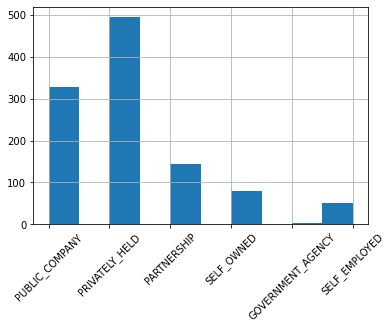

In [3]:
#type of ownership distribution 
df.type.hist(xrot = 45)

<AxesSubplot:>

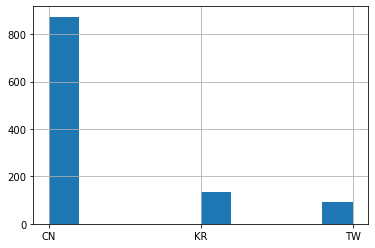

In [4]:
#companies distribution by country level
df.HQ.hist()

<AxesSubplot:>

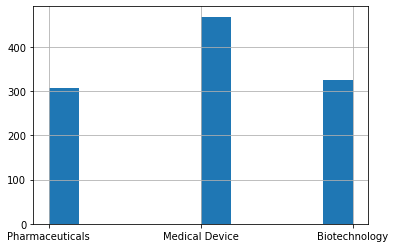

In [5]:
#industry distribution
df.industries.hist()

<AxesSubplot:>

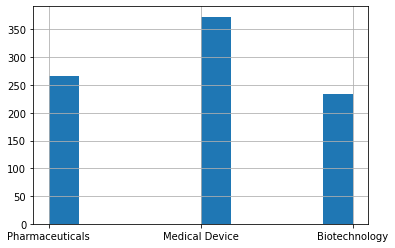

In [6]:
#industry distribution by Country level
df[df['HQ'].apply(lambda x: x=='CN')].industries.hist()

In [7]:
df[df['HQ'].apply(lambda x: x=='CN')].industries.apply(lambda x: x=='Pharmaceuticals').value_counts()

False    607
True     267
Name: industries, dtype: int64

<AxesSubplot:>

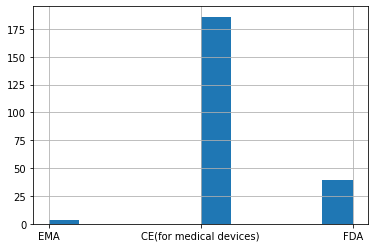

In [8]:
#certification distribution
df.certification_by.hist()

In [9]:
df.certification_by.apply(lambda x: x=='EMA').value_counts()

False    1096
True        3
Name: certification_by, dtype: int64

<AxesSubplot:>

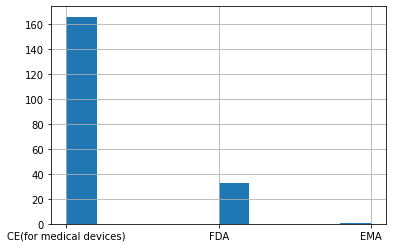

In [10]:
#certification distribution by country level(i.e.China)
df[df['HQ'].apply(lambda x: x=='CN')].certification_by.hist()

In [11]:
df[df['HQ'].apply(lambda x: x=='CN')].certification_by.apply(lambda x: x=='EMA').value_counts()

False    873
True       1
Name: certification_by, dtype: int64

graph for type: total =6


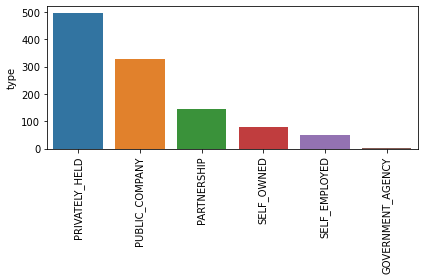

graph for staff_count: total =165


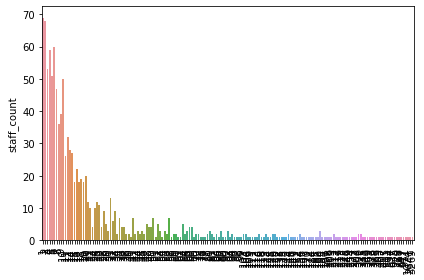

graph for follower_count: total =440


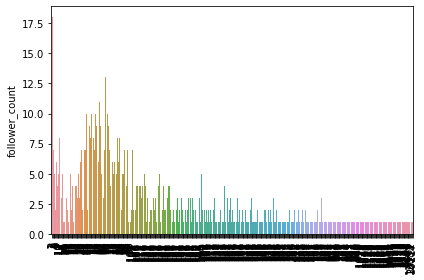

graph for HQ: total =3


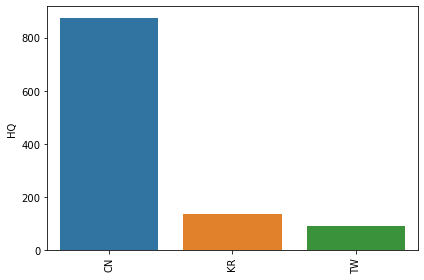

graph for city: total =188


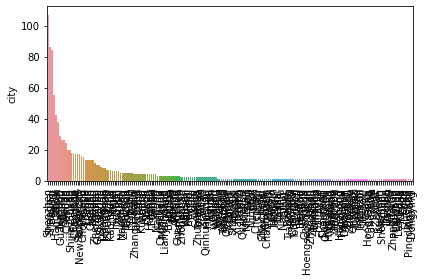

graph for province: total =29


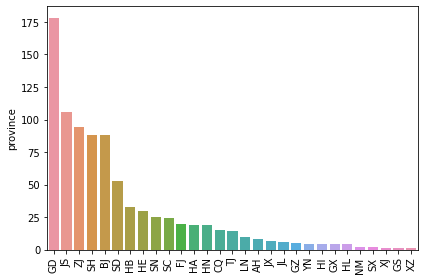

graph for industries: total =3


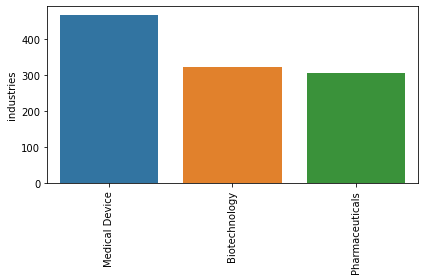

graph for age_of_company: total =61


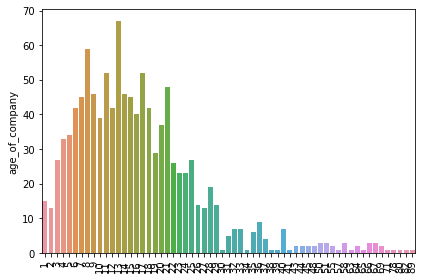

graph for certification_by: total =3


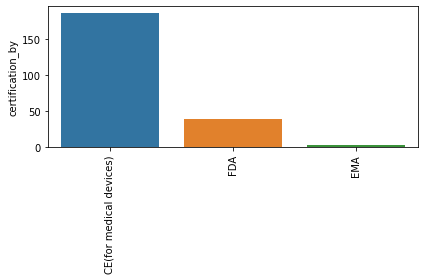

In [12]:
df_cat = df[['type','staff_count', 'follower_count','HQ','city','province','industries','age_of_company','certification_by']]

for i in df_cat.columns:
     cat_num = df_cat[i].value_counts()
     print("graph for %s: total =%d" % (i, len(cat_num))) 
     chart = sns.barplot(x=cat_num.index, y=cat_num) 
     chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
     plt.tight_layout()
     plt.show()



In [13]:
pd.set_option('display.max_rows', 20)
df.city.apply(lambda x: x.lower()).value_counts().dropna()

shenzhen        107
shanghai         86
beijing          84
seoul            55
hangzhou         42
               ... 
linyi             1
yilan             1
taizhou           1
pingdingshan      1
yanji             1
Name: city, Length: 188, dtype: int64

In [14]:
#HC companies distribution in China
CN_pv = pd.pivot_table(
                   df[df.HQ == 'CN'], index = ['province', 'city'], 
                   values = 'company_name', 
                   aggfunc= 'count'
                     ).sort_values('company_name', ascending = False).dropna()
CN_pv.rename(columns = {'company_name':'comp_count'}, inplace = True)
CN_pv.head(10)

comp_count
province city                 
GD       Shenzhen          107
SH       Shanghai           86
BJ       Beijing            84
ZJ       Hangzhou           42
JS       Nanjing            29
         Suzhou             26
GD       Guangzhou          26
HB       Wuhan              24
SN       Xi’an              20
SC       Chengdu            20

In [15]:
#HC companies distribution in South Korea
KR_pv = pd.pivot_table(
                   df[df.HQ == 'KR'], index = 'city', 
                   values = 'company_name', 
                   aggfunc= 'count'
                     ).sort_values('company_name', ascending = False).dropna()
KR_pv.rename(columns = {'company_name':'comp_count'}, inplace = True)
KR_pv.head(10)

,comp_count
city,
Seoul,55
Daejeon,18
Seongnam,17
Incheon,6
Suwon,4
Chuncheon,3
Daegu,3
Yongin,2
Wonju,2


In [16]:
#HC companies distribution in Taiwan
TW_pv = pd.pivot_table(
                   df[df.HQ == 'TW'], index = 'city', 
                   values = 'company_name', 
                   aggfunc= 'count'
                     ).sort_values('company_name', ascending = False).dropna()
TW_pv.rename(columns = {'company_name':'comp_count'}, inplace = True)
TW_pv.head(10)

,comp_count
city,
Taipei,38
New Taipei City,16
Kaohsiung,7
Hsinchu,5
Taoyuan,5
Zhubei,5
Taichung,4
Tainan,4
Changhua,1


In [17]:
#created pivot df
df_pivots = df[['HQ', 'province', 'city', 'type', 'industries', 'certification_by', 'age_of_company', 'company_name']].reset_index()
df_pivots.rename(columns = {'company_name':'comp_count'}, inplace = True)


In [18]:
for i in df_pivots.columns: 
      print(i) 
      print(pd.pivot_table(df_pivots, index = i, 
                           values='comp_count', aggfunc='count'
                          ).sort_values('comp_count', ascending=False))

index
       comp_count
index            
0               1
730             1
736             1
735             1
734             1
...           ...
372             1
373             1
374             1
375             1
1098            1

[1099 rows x 1 columns]
HQ
    comp_count
HQ            
CN         874
KR         134
TW          91
province
          comp_count
province            
GD               178
JS               106
ZJ                94
SH                88
BJ                88
...              ...
NM                 2
SX                 2
GS                 1
XJ                 1
XZ                 1

[29 rows x 1 columns]
city
              comp_count
city                    
Shenzhen             107
Shanghai              86
Beijing               84
Seoul                 55
Hangzhou              42
...                  ...
Qianjiang              1
Pohang                 1
Pingxiang              1
Pingdingshan           1
Anseong                1

[188 rows x 1 columns

ValueError: Grouper for 'comp_count' not 1-dimensional

In [ ]:
#pivot tables by country level(i.e.China)
for i in df_pivots.columns: 
      print(i) 
      print(pd.pivot_table(df_pivots[df_pivots.HQ.apply(lambda x:x=='CN')], index = i, 
                           values='comp_count', aggfunc='count'
                          ).sort_values('comp_count', ascending=False))

In [ ]:
#read a new file: therapeutic areas cleaned
df1 = pd.read_csv('therapeutic_areas_cleaned.csv')
df1.head()

In [ ]:
#created pivot for df1
df1_pivots = df1[['HQ', 'province', 'city', 'type', 'industries', 'age_of_company', 'therapeutic_area', 'company_name']].reset_index()
df1_pivots.rename(columns = {'company_name':'comp_count'}, inplace = True)

In [ ]:
#pivots tables for the companies who covered our target therapeutic areas
for i in df1_pivots.columns: 
      print(i) 
      print(pd.pivot_table(df1_pivots, index = i, 
                           values='comp_count', aggfunc='count'
                          ).sort_values('comp_count', ascending=False))

In [ ]:
#therapeutic area distribution
df1_cat = df1['therapeutic_area']

cat_num = df1_cat.value_counts()
print("graph for %s: total =%d" % (i, len(cat_num))) 
chart = sns.barplot(x=cat_num.index, y=cat_num) 
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

In [ ]:
#therapeutic area distribution by country level(i.e. China)
for i in df1_pivots.columns: 
      print(i) 
      print(pd.pivot_table(df1_pivots[df1_pivots.HQ.apply(lambda x:x=='CN')], index = i, 
                           values='comp_count', aggfunc='count'
                          ).sort_values('comp_count', ascending=False))

In [ ]:
#number of thera areas covered by each company
thera_pv = df1.pivot_table(
                   index = ['HQ', 'city', 'company_name'],
                   values = 'therapeutic_area',
                   aggfunc = 'count'
                     ).sort_values('company_name')
thera_pv.rename(columns = {'therapeutic_area':'thera_count'}, inplace = True)
thera_pv.head(10)


In [ ]:
thera_pv = df1.pivot_table(
                   index = ['HQ', 'city', 'company_name'],
                   values = 'therapeutic_area',
                   aggfunc = sum
                     ).sort_values('company_name')
thera_pv.head(10)